#  Project 1 - Bee Subspecie Classification (logistic regression vs neural network approach) 

### Import relevant libraries

In [3]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, plot_roc_curve, roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from statistics import mean, stdev
#to load matlab mat files
from scipy.io import loadmat

size = 100

## PART 2: Load data

In [35]:
# -----------------------------------
# Loading of the data from the .csv

ds = pd.read_csv('bee_dataset/balanced_ml_databackup.csv')
features=ds['features']
y1=ds['class']

# -----------------------------------
# Mapping the labels to integers from the dictionary

y2 = {'Italian honey bee':1,'Carniolan honey bee':2,
      'Russian honey bee':3}
y = (pd.Series(y1)).map(y2)
y = np.array(y)
#y = np.reshape(y, (-1, 1))
#print(type(y))
#print(y)

# -----------------------------------

n_examples = features.shape[0]
feature_size = size*size
X = np.empty((n_examples,feature_size), float)
for idx,f in enumerate(features):
        arr_f = np.fromstring(f, dtype=float, sep=' ')
        arr_f = np.reshape(arr_f, (1,arr_f.shape[0]))
        X[idx,:] = np.copy(arr_f)
#X = np.copy(arr)
#print(y.shape)
#print(X.shape)

# -----------------------------------
# Split of the data
# 3 Methods used - choose 1 only

# 80%/20% Holdout Method 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 70%/30% Holdout Method 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 3 way split: Train/Dev/Test Sets
# As we use a small data set (up to 10000 examples) we will use this division: 60%/20%/20%
# One approach to dividing the dataset into train, test, cv with 0.6, 0.2, 0.2 is to use the train_test_split method twice like below.

#X, X_test, y, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)
#X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.25,train_size =0.75)

# -----------------------------------

# Informations about the shapes
print('X_train.shape: ' + str(X_train.shape))
print('y_train.shape: ' + str(y_train.shape))
print('X_test.shape: ' + str(X_test.shape))
print('y_test.shape: ' + str(y_test.shape))

# For when using the 3 way split:

#print('X_cv.shape: ' + str(X_cv.shape))
#print('y_cv.shape: ' + str(y_cv.shape))

# -----------------------------------

X_train.shape: (1052, 10000)
y_train.shape: (1052,)
X_test.shape: (451, 10000)
y_test.shape: (451,)


In [36]:
# Apllying the classifier from the sklearn library and fitting the training data to the model

model = LogisticRegression(max_iter=20000)
#clf = OneVsRestClassifier(model).fit(X_train, y_train)
model.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

In [37]:
# Testing the model 

score = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print("Training Set accuracy: {}%".format(score*100))
print("Testing Set accuracy: {}%".format(score2*100))

Training Set accuracy: 99.90494296577947%
Testing Set accuracy: 76.27494456762749%


[[112   6  33]
 [  5 123  19]
 [ 13  31 109]]
----------------------
Confusion Matrix Display:


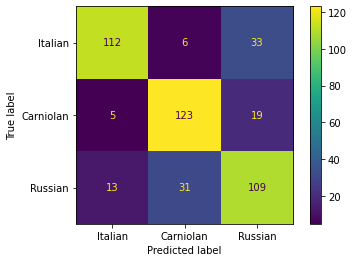

In [38]:
# Getting predictions from the model to obtain the metrics and performance measures

predictions = model.predict(X_test)

# Confusion Matrix

cm = confusion_matrix(y_test, predictions) #,normalize='all')
print(cm)
print("----------------------")
display_labels = ['Italian', 'Carniolan', 'Russian']
print("Confusion Matrix Display:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels)
disp.plot()

plt.show()

In [39]:
# Classification Report

target_names = ['Italian Honey Bee', 'Carniolan Honey Bee', 'Russian Honey Bee']
print(classification_report(y_test, predictions, target_names=target_names))

                     precision    recall  f1-score   support

  Italian Honey Bee       0.86      0.74      0.80       151
Carniolan Honey Bee       0.77      0.84      0.80       147
  Russian Honey Bee       0.68      0.71      0.69       153

           accuracy                           0.76       451
          macro avg       0.77      0.76      0.76       451
       weighted avg       0.77      0.76      0.76       451



In [40]:
#K-Fold Cross-Validation
#Pros: The whole dataset is used as both a training set and validation set
#Cons: Not to be used for imbalanced datasets

kf=KFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=kf)
#print("Cross Validation Scores: {}".format(score))
print("Average Cross Validation accuracy :{}%".format(score.mean()*100))
print("Minimum Cross Validation accuracy :{}%".format(score.min()*100))
print("Maximum Cross Validation accuracy :{}%".format(score.max()*100))
print('\nStandard Deviation is:', stdev(score))

Average Cross Validation accuracy :76.23741819002483%
Minimum Cross Validation accuracy :72.98578199052133%
Maximum Cross Validation accuracy :77.72511848341233%

Standard Deviation is: 0.018691387283700747


In [41]:
#Stratified K-Fold Cross-Validation
#Pros: Works perfectly well for Imbalanced Data
#Cons: Not suitable for Time Series data

stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(model,X_train,y_train,cv=stratifiedkf)
#print("Cross Validation Scores: {}".format(score))
print("Average Cross Validation accuracy :{}%".format(score.mean()*100))
print("Minimum Cross Validation accuracy :{}%".format(score.min()*100))
print("Maximum Cross Validation accuracy :{}%".format(score.max()*100))
print('\nStandard Deviation is:', stdev(score))

Average Cross Validation accuracy :75.57300835025953%
Minimum Cross Validation accuracy :72.98578199052133%
Maximum Cross Validation accuracy :77.61904761904762%

Standard Deviation is: 0.017489713951600712


In [ ]:
#Leave One Out cross-validation
#Tested but didn't obatin results in a productive time 
#because it is not computationally efficient and is time-consuming for this case of complex problem

#loo=LeaveOneOut()
#score=cross_val_score(model,X_train,y_train,cv=loo)
#print("Cross Validation Scores: {}".format(score))
#print("Average Cross Validation accuracy :{}%".format(score.mean()*100))
#print("Minimum Cross Validation accuracy :{}%".format(score.min()*100))
#print("Maximum Cross Validation accuracy :{}%".format(score.max()*100))
#print('\nStandard Deviation is:', stdev(score))